In [2]:
# setup

import numpy as np, pickle
import matplotlib.pyplot as plt
from matplotlib import rcParams
import tensorflow as tf
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

params = {
   'axes.labelsize': 16,
   'font.size': 16,
   'legend.fontsize': 16,
   'xtick.labelsize': 13,
   'ytick.labelsize': 13,
   'text.usetex': False,
    'font.family':"sans-serif",
   'font.sans-serif':'Arial',
   'text.usetex': False,
   }

#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
mnist = input_data.read_data_sets("data/fashion", one_hot=True)

rcParams.update(params)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


# Does Parameter-Sharing Regularization Help or Hurt?

0 0
Adding DZ+L1 regularization
1 0
Adding DZ+L1 regularization
2 0
Adding DZ+L1 regularization
3 0
Adding DZ+L1 regularization
4 0
Adding DZ+L1 regularization
0 1
Adding DZ+L1 regularization
1 1
Adding DZ+L1 regularization
2 1
Adding DZ+L1 regularization
3 1
Adding DZ+L1 regularization
4 1
Adding DZ+L1 regularization
0 2
Adding DZ+L1 regularization
1 2
Adding DZ+L1 regularization
2 2
Adding DZ+L1 regularization
3 2
Adding DZ+L1 regularization
4 2
Adding DZ+L1 regularization
0 3
Adding DZ+L1 regularization
1 3
Adding DZ+L1 regularization
2 3
Adding DZ+L1 regularization
3 3
Adding DZ+L1 regularization
4 3
Adding DZ+L1 regularization
0 4
Adding DZ+L1 regularization
1 4
Adding DZ+L1 regularization
2 4
Adding DZ+L1 regularization
3 4
Adding DZ+L1 regularization
4 4
Adding DZ+L1 regularization
0 5
Adding DZ+L1 regularization
1 5
Adding DZ+L1 regularization
2 5
Adding DZ+L1 regularization
3 5
Adding DZ+L1 regularization
4 5
Adding DZ+L1 regularization
0 6
Adding DZ+L1 regularization
1 6
Addi

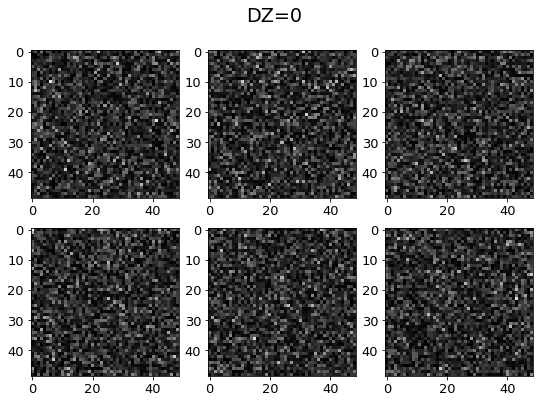

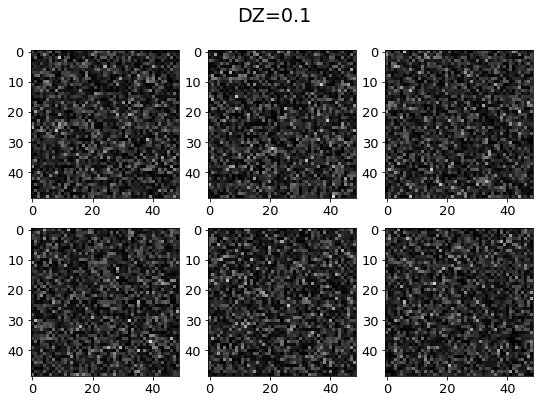

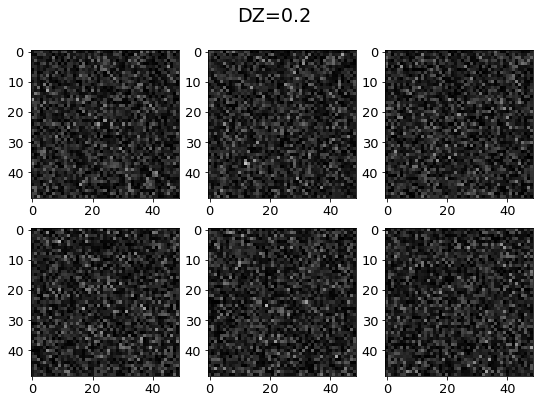

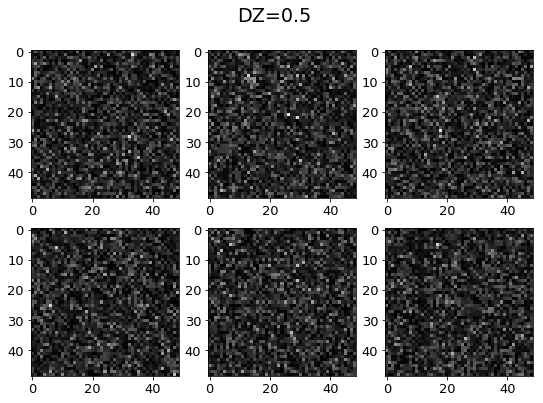

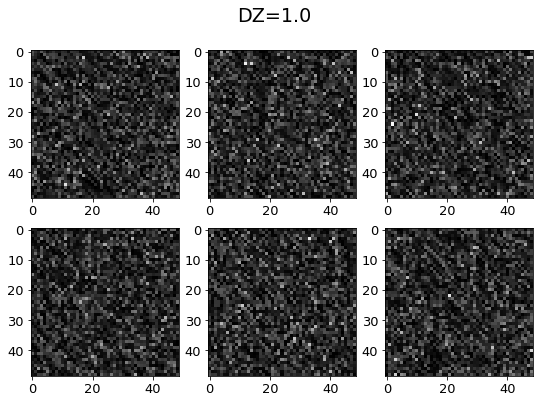

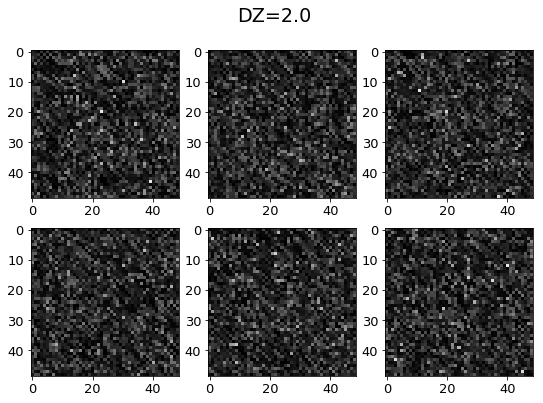

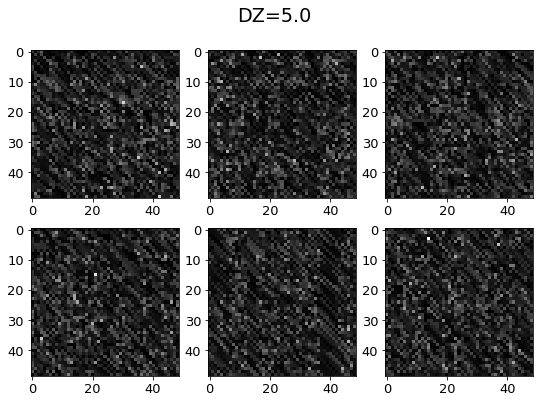

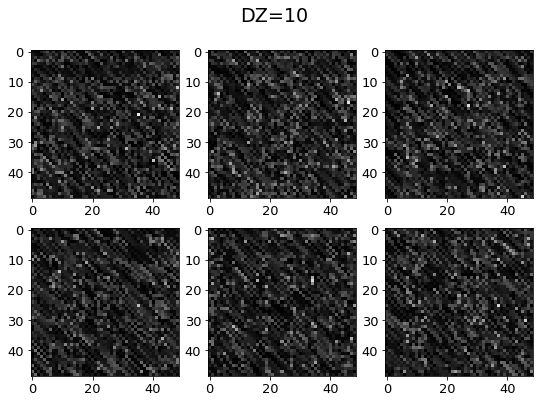

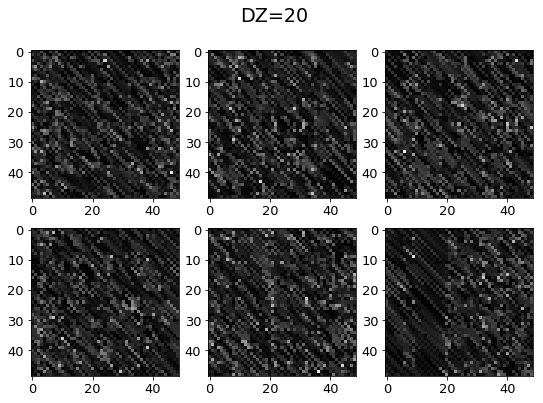

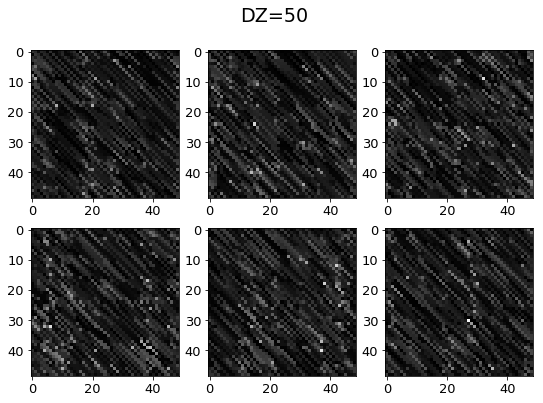

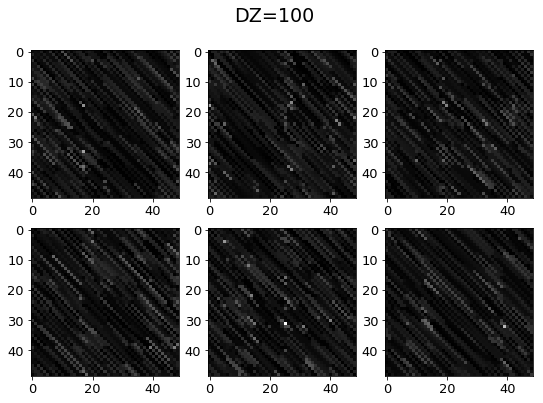

In [17]:
iters = 5
dzs = [0, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10, 20, 50, 100]

ts = np.zeros((iters, len(dzs)))
vs = np.zeros((iters, len(dzs)))

for j, dz in enumerate(dzs):
    for i in range(iters):
        print(i,j)
        t, v, weights = fully_connected(mnist, pool=4, num_channels=16, 
                                        verbose=False, batches=8000, return_weights=True, 
                                        print_every=500, reg_kind='DZ+L1', reg_value=[dz,0])
        ts[i,j] = t; vs[i,j] = v;
        if i==0:
            visualize_general_weights(weights, num_channels=16, pool=4, suptitle='DZ='+str(dz))

0 0
Adding HZ regularization
1 0
Adding HZ regularization
2 0
Adding HZ regularization
3 0
Adding HZ regularization
4 0
Adding HZ regularization
0 1
Adding HZ regularization
1 1
Adding HZ regularization
2 1
Adding HZ regularization
3 1
Adding HZ regularization
4 1
Adding HZ regularization
0 2
Adding HZ regularization
1 2
Adding HZ regularization
2 2
Adding HZ regularization
3 2
Adding HZ regularization
4 2
Adding HZ regularization
0 3
Adding HZ regularization
1 3
Adding HZ regularization
2 3
Adding HZ regularization
3 3
Adding HZ regularization
4 3
Adding HZ regularization
0 4
Adding HZ regularization
1 4
Adding HZ regularization
2 4
Adding HZ regularization
3 4
Adding HZ regularization
4 4
Adding HZ regularization
0 5
Adding HZ regularization
1 5
Adding HZ regularization
2 5
Adding HZ regularization
3 5
Adding HZ regularization
4 5
Adding HZ regularization
0 6
Adding HZ regularization
1 6
Adding HZ regularization
2 6
Adding HZ regularization
3 6
Adding HZ regularization
4 6
Adding HZ 

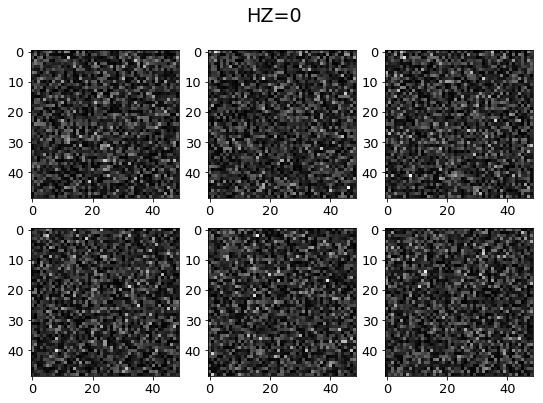

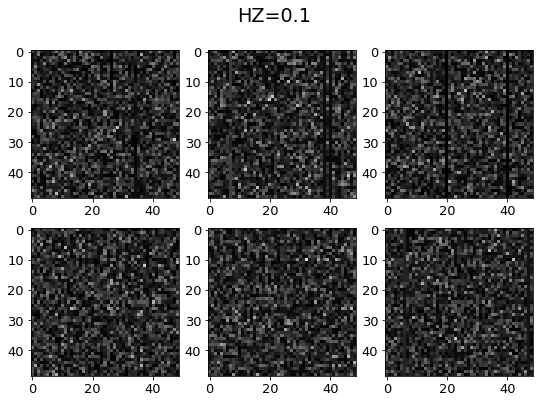

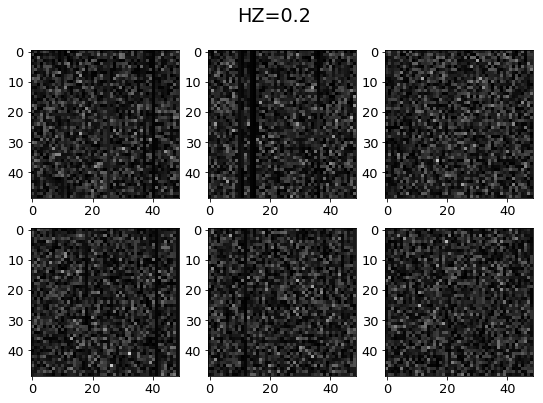

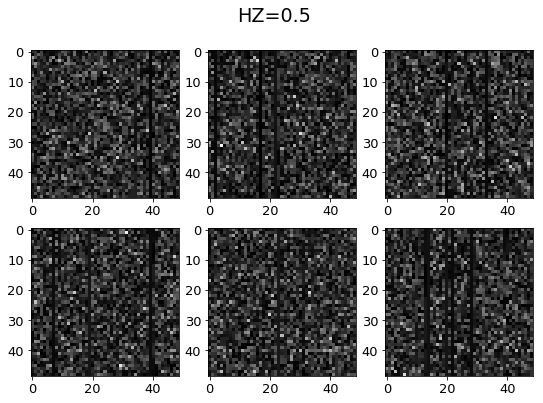

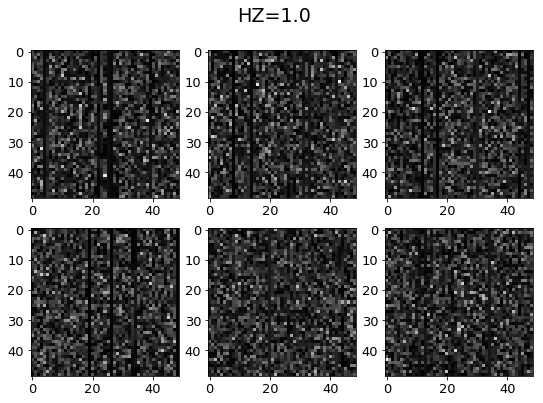

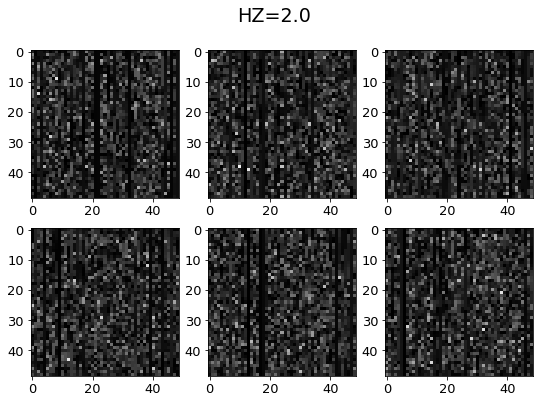

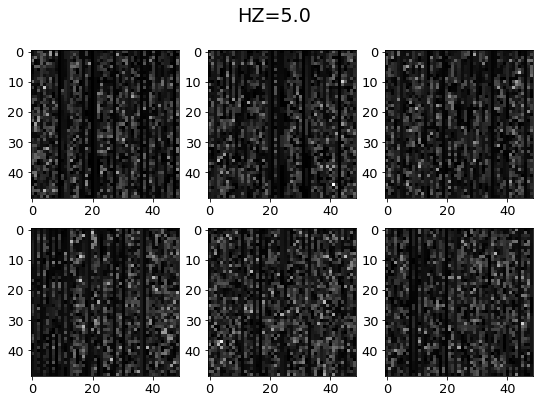

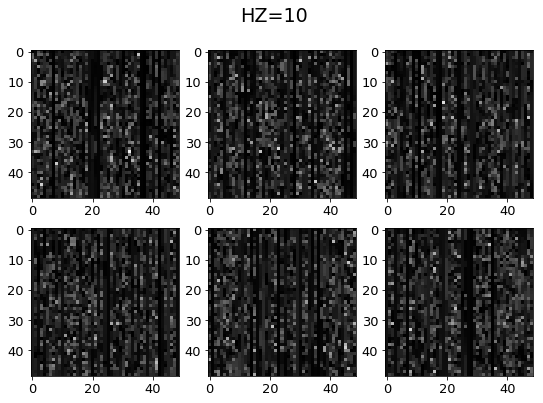

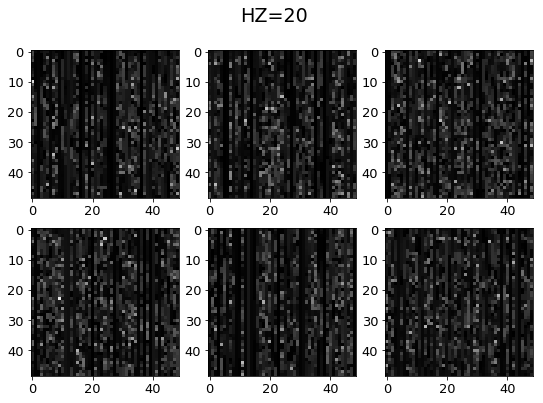

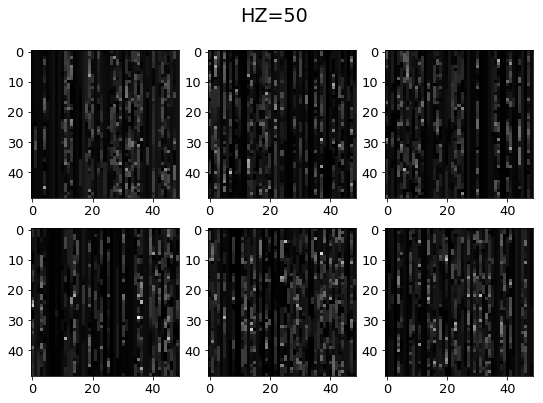

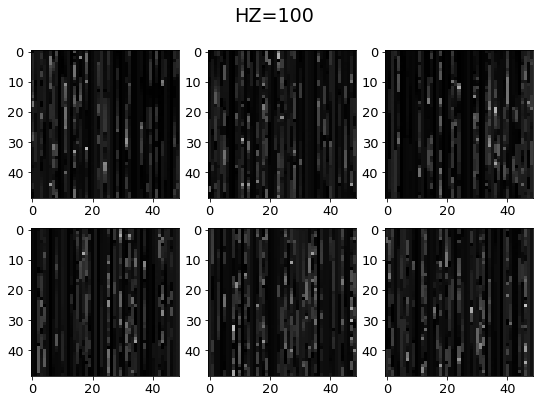

In [16]:
iters = 5
dzs = [0, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10, 20, 50, 100]

ts_ = np.zeros((iters, len(dzs)))
vs_ = np.zeros((iters, len(dzs)))

for j, dz in enumerate(dzs):
    for i in range(iters):
        print(i,j)
        t, v, weights = fully_connected(mnist, pool=4, num_channels=16, 
                                        verbose=False, batches=8000, return_weights=True, 
                                        print_every=500, reg_kind='HZ', reg_value=dz)
        ts_[i,j] = t; vs_[i,j] = v;
        if i==0:
            visualize_general_weights(weights, num_channels=16, pool=4, suptitle='HZ='+str(dz))

In [24]:
ts_conv = np.zeros((iters))
vs_conv = np.zeros((iters))

for i in range(iters):
    t_conv, v_conv, weights = convolutional(mnist, pool=4, num_channels=16, filter_size=3,
                                verbose=False, batches=8000, return_weights=True, 
                                print_every=500)
    ts_conv[i] = t_conv
    vs_conv[i] = v_conv

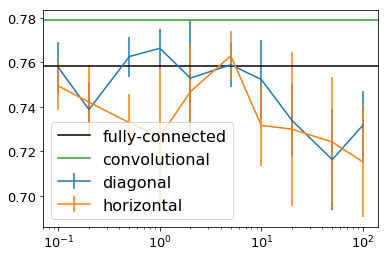

In [25]:
plt.axhline(np.mean(vs[:,0],axis=0), c='k', label='fully-connected')
plt.errorbar(dzs[1:], np.mean(vs[:,1:],axis=0), yerr=np.std(vs[:,1:],axis=0), label='diagonal')
plt.errorbar(dzs[1:], np.mean(vs_[:,1:],axis=0), yerr=np.std(vs_[:,1:],axis=0), label='horizontal')
plt.axhline(np.mean(vs_conv,axis=0), c='C2', label='convolutional')
plt.xscale('log')
plt.legend()

* Compare performance in extreme regime
* Can we get small filters to emerge?
* Discretize into small filters?